# Dataset visualisation

In [1]:
from data_loaders.data_module import ChestDataModule
from transforms.finetuning import ChestTrainTransforms, ChestValTransforms
from utils.visualisation import showInRow
from pytorch_lightning import seed_everything
seed_everything(123456)

Global seed set to 123456


123456

In [2]:
def show_samples(data):
    batches = 4
    for batch in data.train_dataloader():
        imgs, targets = batch["image"],batch['target']
        showInRow(imgs, targets, tensor=True)
        batches -=  1
        if batches<1:
            break

## Chest 14 Dataset

Loaded datasets: chest14
Before sampling length:  69219
After sampling length:  69219
Creating balanced dataloader


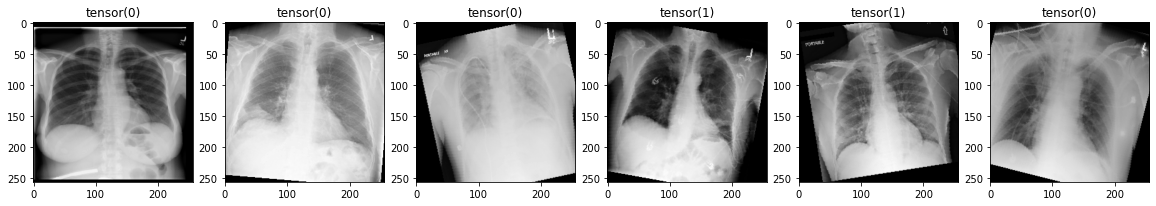

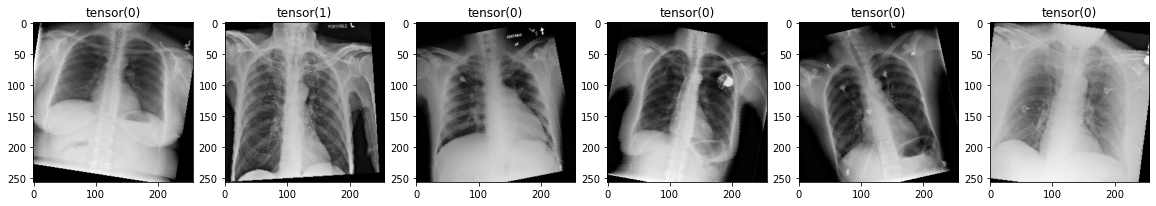

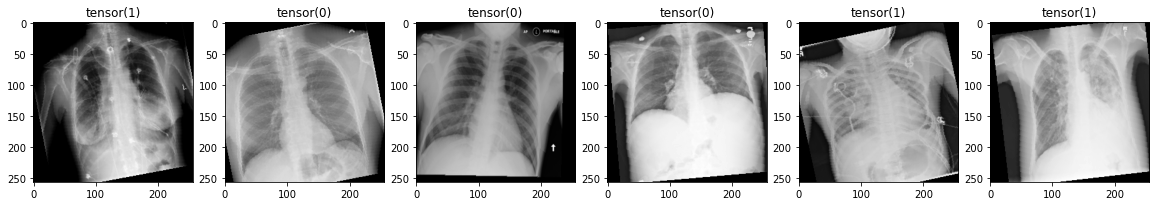

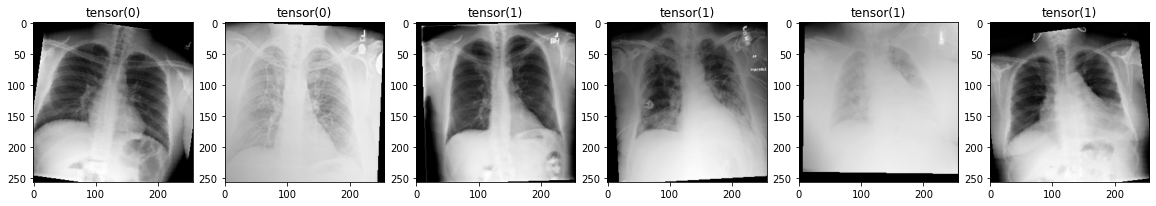

In [3]:
dm = ChestDataModule(ds_list=["chest14"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

## Chexpert Dataset

Loaded datasets: chexpert
Before sampling length:  152206
After sampling length:  152206
Creating balanced dataloader


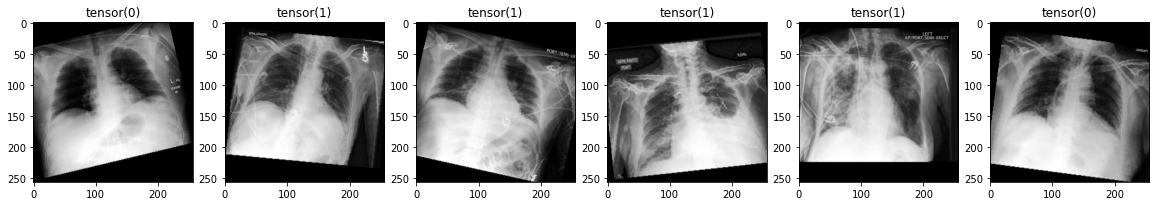

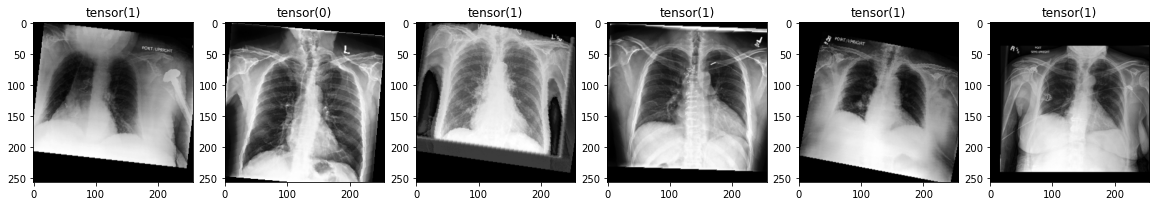

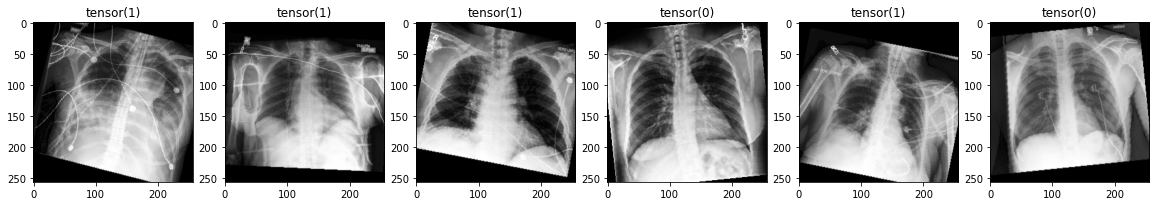

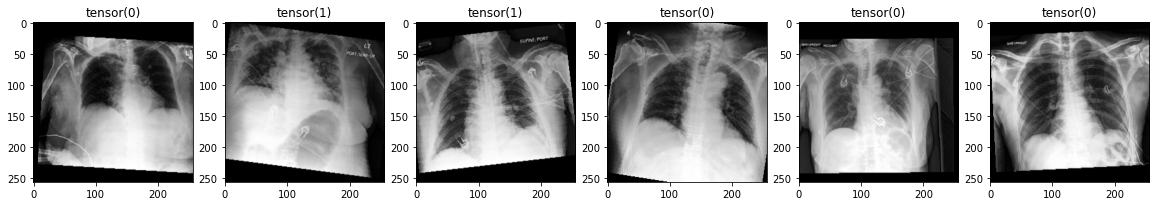

In [4]:
dm = ChestDataModule(ds_list=["chexpert"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

## RSNA dataset

Loaded datasets: rsna
Before sampling length:  24181
After sampling length:  24181
Creating balanced dataloader


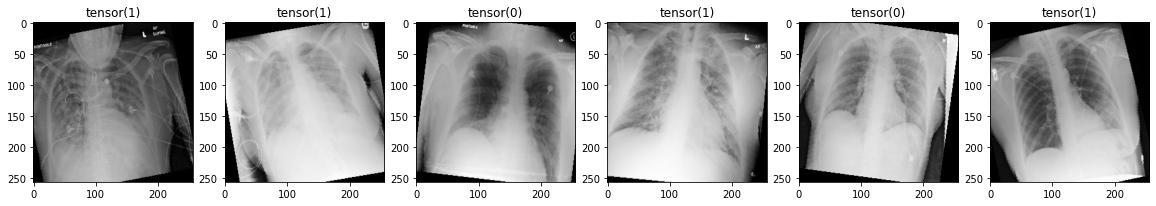

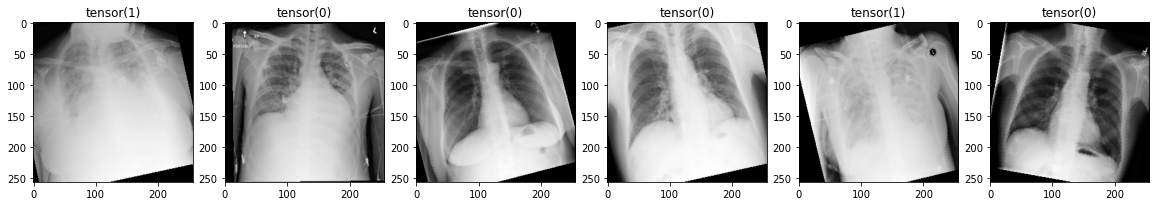

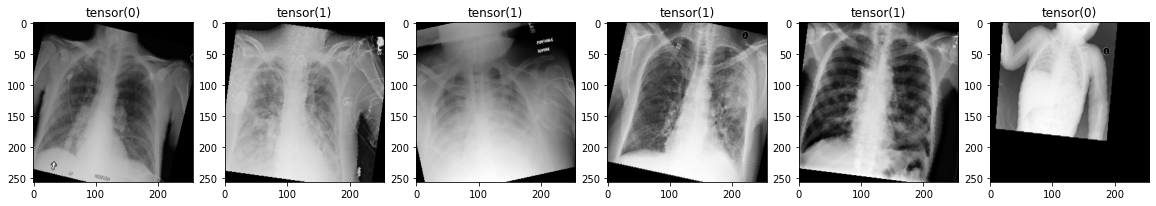

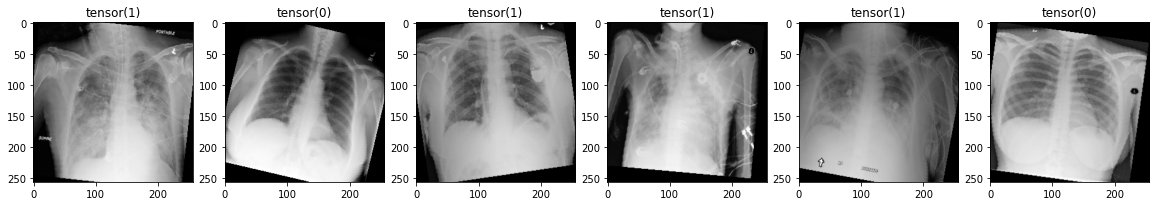

In [8]:
dm = ChestDataModule(ds_list=["rsna"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

## Chest X-ray Pneumonia dataset

Loaded datasets: chest_xray_pneumonia
Before sampling length:  5216
After sampling length:  5216
Creating balanced dataloader


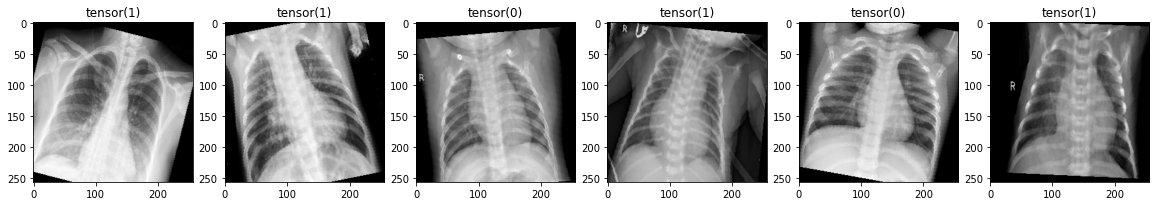

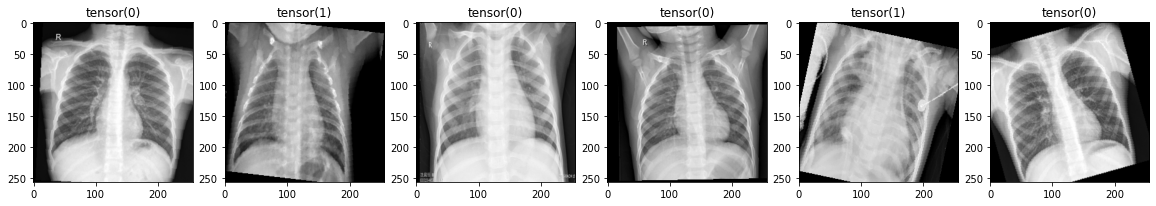

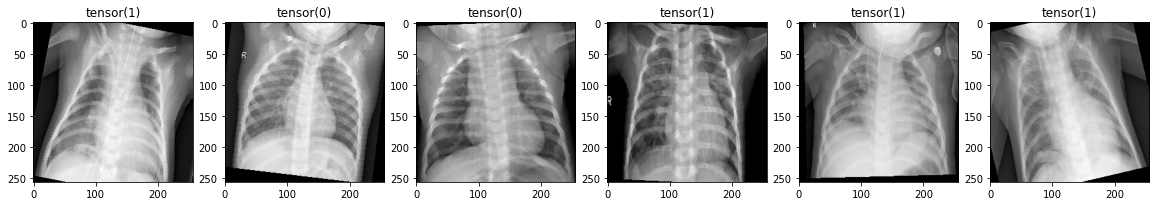

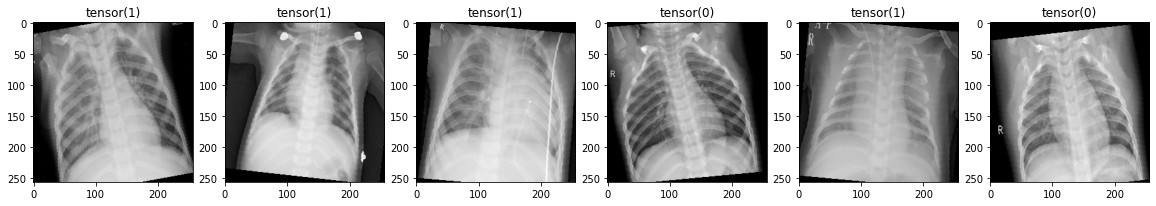

In [9]:
dm = ChestDataModule(ds_list=["chest_xray_pneumonia"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

## GB7 FLG dataset

Loaded datasets: gb7_flg
Before sampling length:  101
After sampling length:  101
Creating balanced dataloader


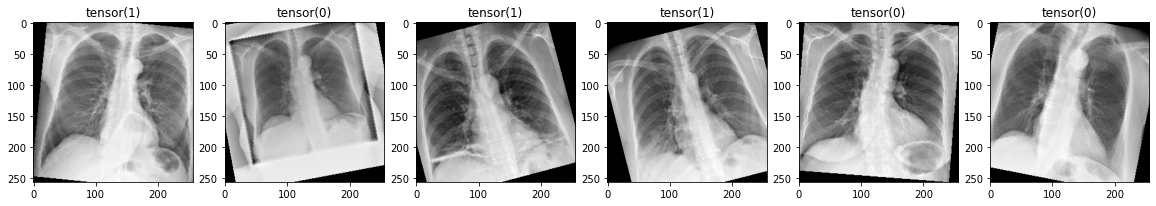

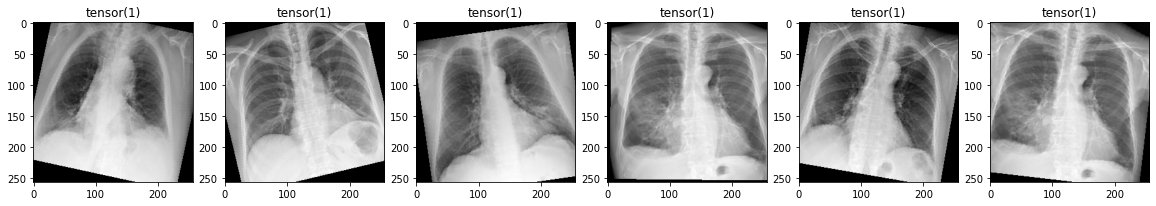

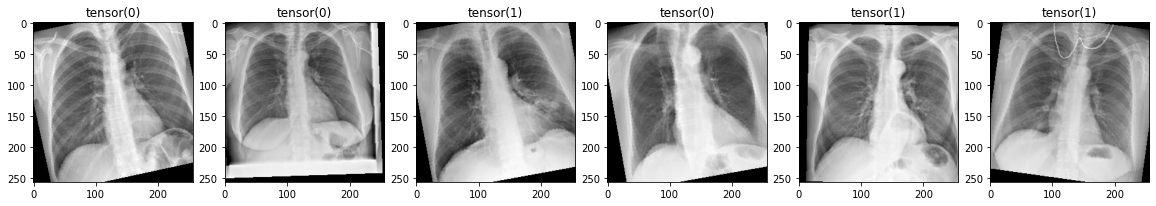

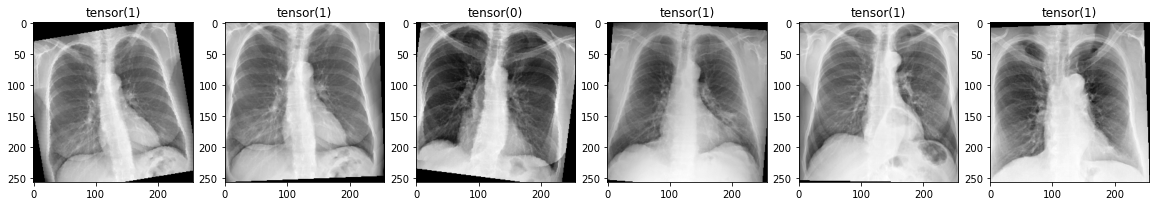

In [10]:
dm = ChestDataModule(ds_list=["gb7_flg"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

## TBX11K

Loaded datasets: tbx11k
Before sampling length:  6600
After sampling length:  6600
Creating balanced dataloader


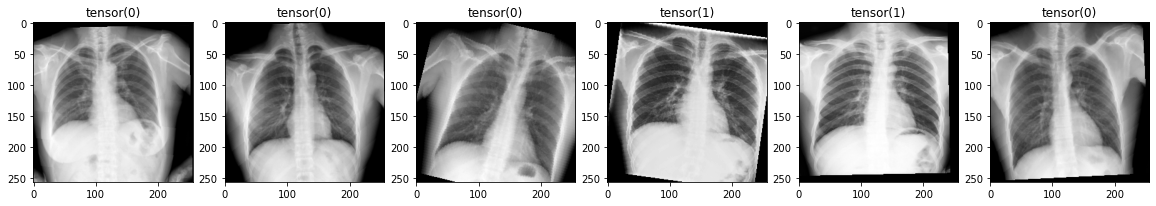

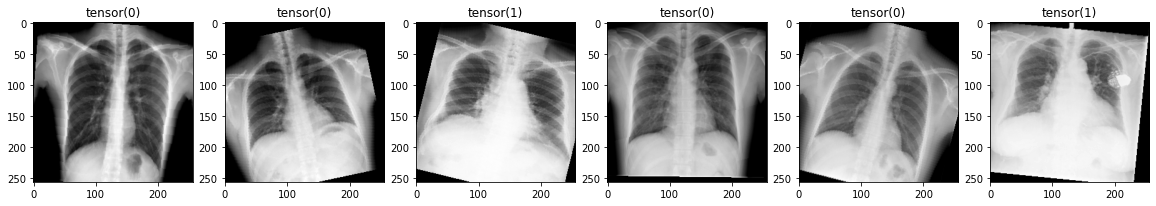

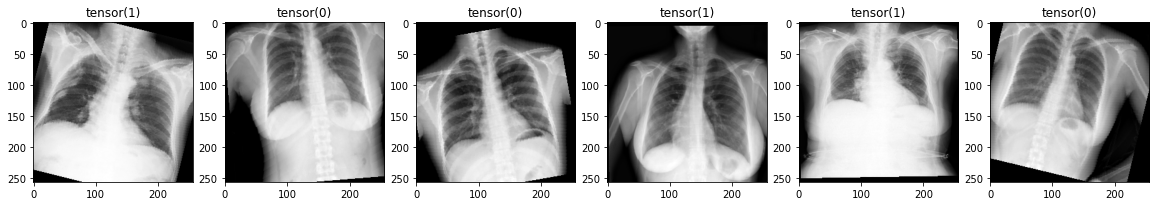

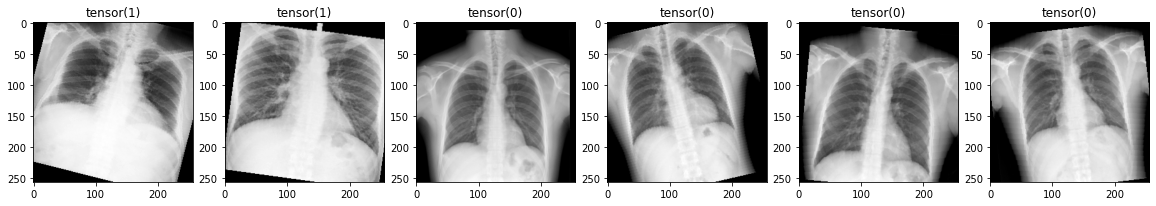

In [11]:
dm = ChestDataModule(ds_list=["tbx11k"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

# Vinbigdata dataset

Loaded datasets: vinbigdata
Before sampling length:  12000
After sampling length:  12000
Creating balanced dataloader


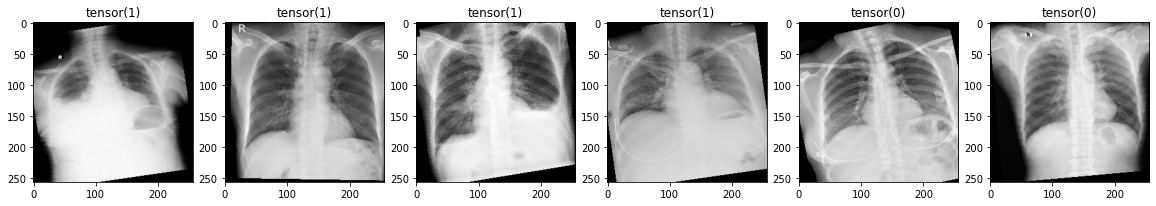

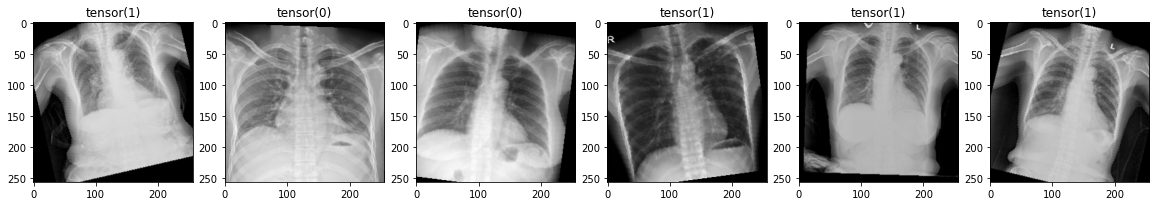

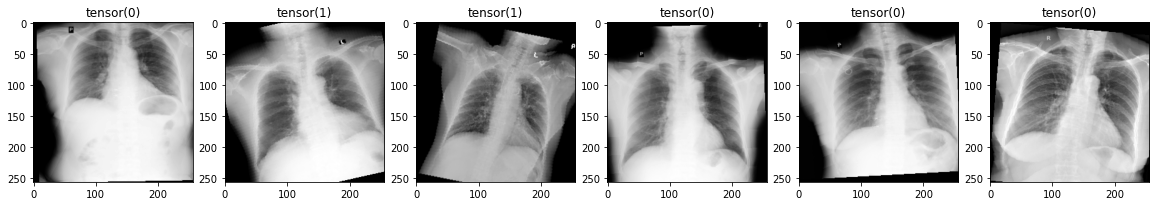

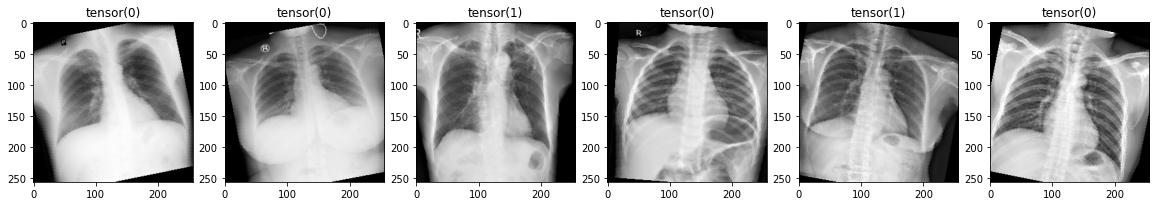

In [12]:
dm = ChestDataModule(ds_list=["vinbigdata"],batch_size=6, balanced=True)
dm.train_transforms = ChestTrainTransforms(height=256)
show_samples(dm)

In [2]:
from models.baseline import BaseLineClassifier
from models import get_model
import torch

In [3]:
dm = ChestDataModule(['chexpert_5_01'], balanced=False, return_dict=True, batch_size=8)
dm.val_transforms = ChestTrainTransforms(height=224)

Loaded datasets: chexpert_5_01


In [4]:
classifier = BaseLineClassifier(get_model("resnet18", pretrained=True), 
                                num_classes=2, 
                                linear=False,
                                learning_rate=3e-6,
                                b1=0.9,
                                b2=0.999)

Before sampling length:  34055
After sampling length:  34055


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


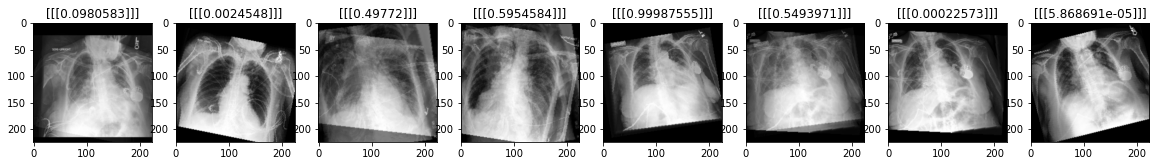

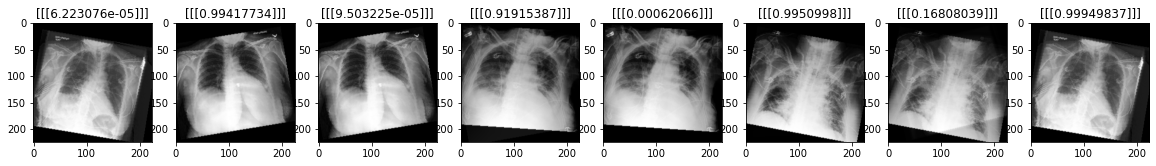

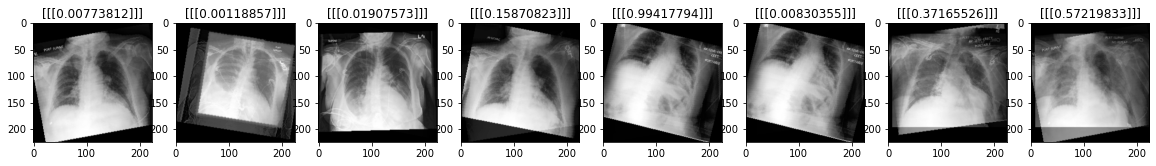

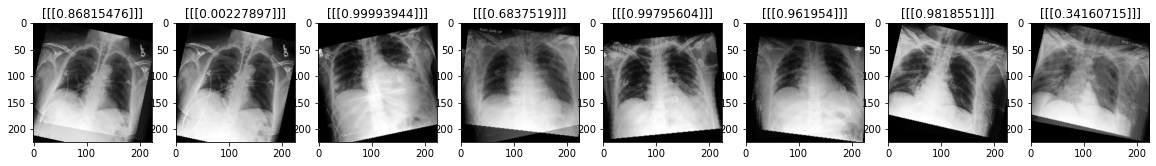

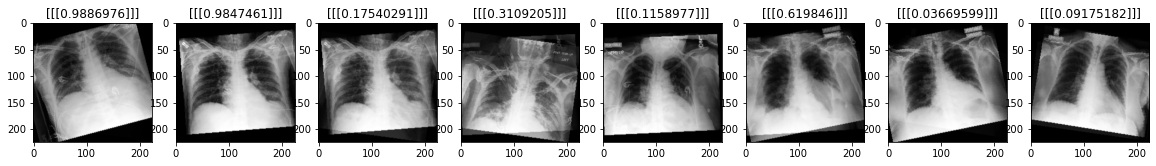

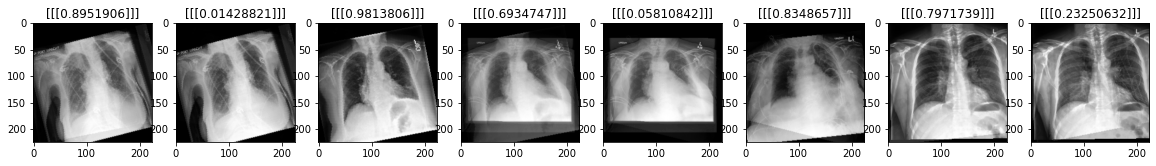

In [5]:
i = 5
for batch in dm.val_dataloader():
    imgs, targets = batch["image"], batch["target"]
    resulted_imgs, tagets, rolled_targets, lambdas, inv_lambdas = classifier.apply_mixup(imgs, targets)
    showInRow(resulted_imgs,lambdas.numpy(), tensor=True)
    i -= 1
    if i < 0:
        break

In [6]:
dm.val_transforms = ChestValTransforms(height=224)

Before sampling length:  34055
After sampling length:  34055


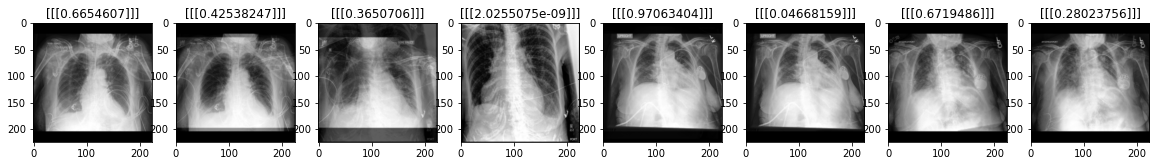

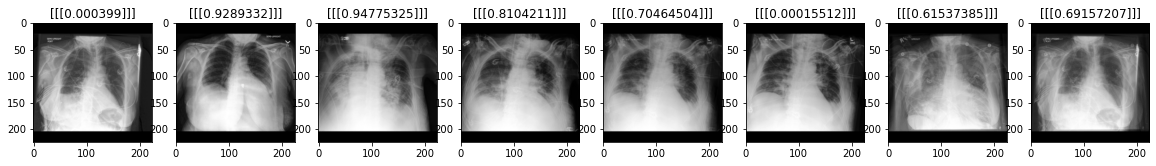

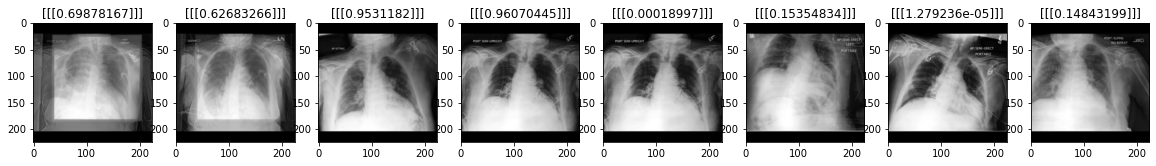

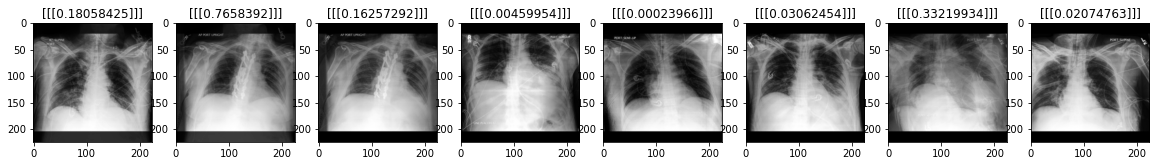

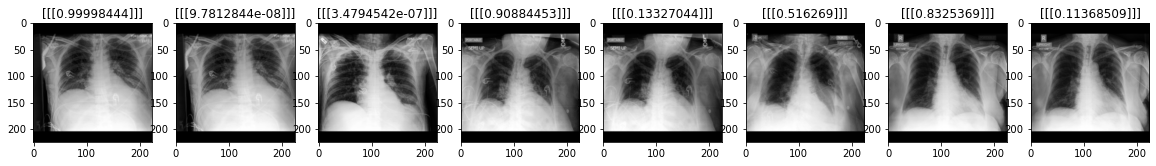

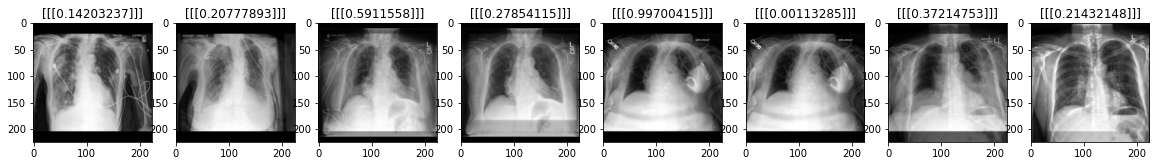

In [7]:
i = 5
for batch in dm.val_dataloader():
    imgs, targets = batch["image"], batch["target"]
    resulted_imgs, tagets, rolled_targets, lambdas, inv_lambdas = classifier.apply_mixup(imgs, targets)
    showInRow(resulted_imgs,lambdas.numpy(), tensor=True)
    i -= 1
    if i < 0:
        break